In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


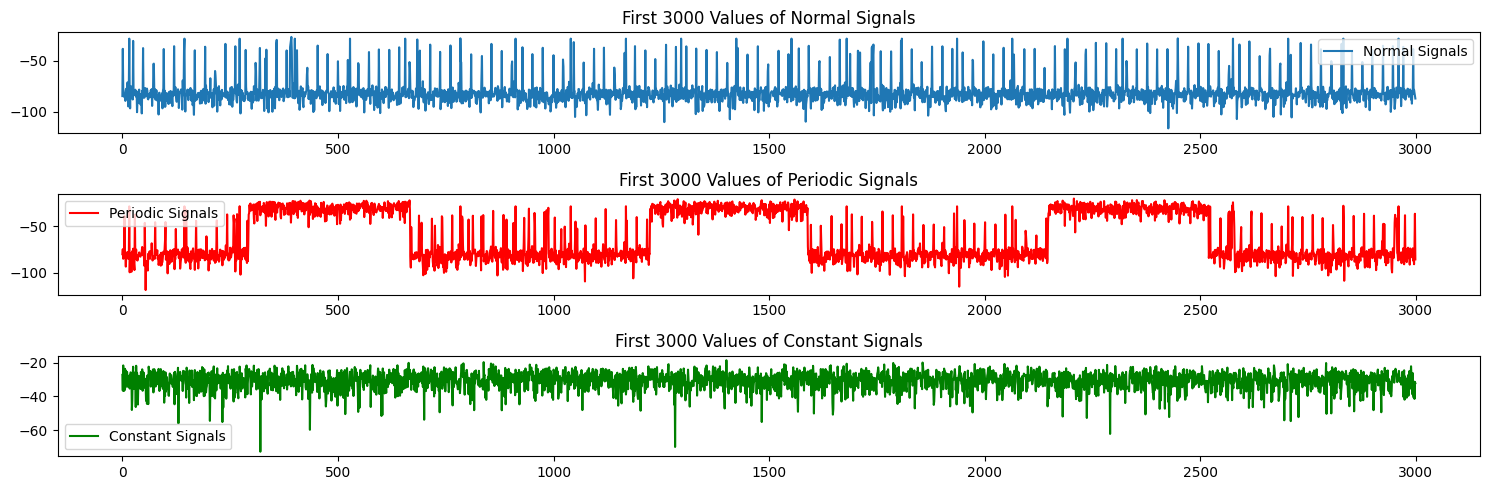

In [2]:
# Load the data
normal_signals = np.loadtxt('/kaggle/input/test-set/normal_channel.txt')
periodic_signals = np.loadtxt('/kaggle/input/test-set/pereodic_jammer.txt')
constant_signals = np.loadtxt('/kaggle/input/test-set/constant_jammer.txt')

# Visualization of first 3000 values from each signal type
plt.figure(figsize=(15,5))
plt.subplot(3,1,1)
plt.plot(normal_signals[:3000], label='Normal Signals')
plt.title('First 3000 Values of Normal Signals')
plt.legend()

plt.subplot(3,1,2)
plt.plot(periodic_signals[:3000], label='Periodic Signals', color='red')
plt.title('First 3000 Values of Periodic Signals')
plt.legend()

plt.subplot(3,1,3)
plt.plot(constant_signals[:3000], label='Constant Signals', color='green')
plt.title('First 3000 Values of Constant Signals')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
# Reshape signals (4100 signals, 100 values each)
normal_signals = normal_signals.reshape(4100, 100)
periodic_signals = periodic_signals.reshape(4100, 100)
constant_signals = constant_signals.reshape(4100, 100)

# Standardization
scaler = StandardScaler()
normal_signals_scaled = scaler.fit_transform(normal_signals)
periodic_signals_scaled = scaler.transform(periodic_signals)
constant_signals_scaled = scaler.transform(constant_signals)

# Prepare labels
normal_labels = np.zeros(4100)  # [1, 0, 0]
periodic_labels = np.ones(4100)  # [0, 1, 0]
constant_labels = np.full(4100, 2)  # [0, 0, 1]

# Combine data
X = np.vstack((normal_signals_scaled, periodic_signals_scaled, constant_signals_scaled))
y = np.concatenate((normal_labels, periodic_labels, constant_labels))

# One-hot encoding
y_onehot = tf.keras.utils.to_categorical(y)


In [4]:
# Split without shuffling
X_train = X[:9840]  # 80% of data
X_test = X[9840:11025]  # 15% of data
X_val = X[11025:]  # 5% of data

y_train = y_onehot[:9840]
y_test = y_onehot[9840:11025]
y_val = y_onehot[11025:]

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)
X_val = X_val.reshape(X_val.shape[0], 100, 1)

# CNN Model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(100, 1)),
    MaxPooling1D(2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Training
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=50, 
                    batch_size=32,
                    verbose=1)


Epoch 1/50


I0000 00:00:1734200570.983846      92 service.cc:145] XLA service 0x7b9da80049e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734200570.983900      92 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734200570.983904      92 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 72/308 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5827 - loss: 0.7828 - precision: 0.5786 - recall: 0.5229

I0000 00:00:1734200574.827778      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6487 - loss: 0.6517 - precision: 0.6499 - recall: 0.6231 - val_accuracy: 1.0000 - val_loss: 0.3889 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7826 - loss: 0.4119 - precision: 0.7851 - recall: 0.7788 - val_accuracy: 1.0000 - val_loss: 0.5414 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8023 - loss: 0.3708 - precision: 0.8041 - recall: 0.7982 - val_accuracy: 1.0000 - val_loss: 0.5612 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.3493 - precision: 0.8129 - recall: 0.8111 - val_accuracy: 1.0000 - val_loss: 0.5389 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.3280 - precision: 0.8270 - recall: 0.8243 - val_accuracy: 1.0000 - val_loss: 0.4883 - val

In [6]:
# Evaluation
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Precision: {test_precision*100:.2f}%")
print(f"Test Recall: {test_recall*100:.2f}%")


Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%


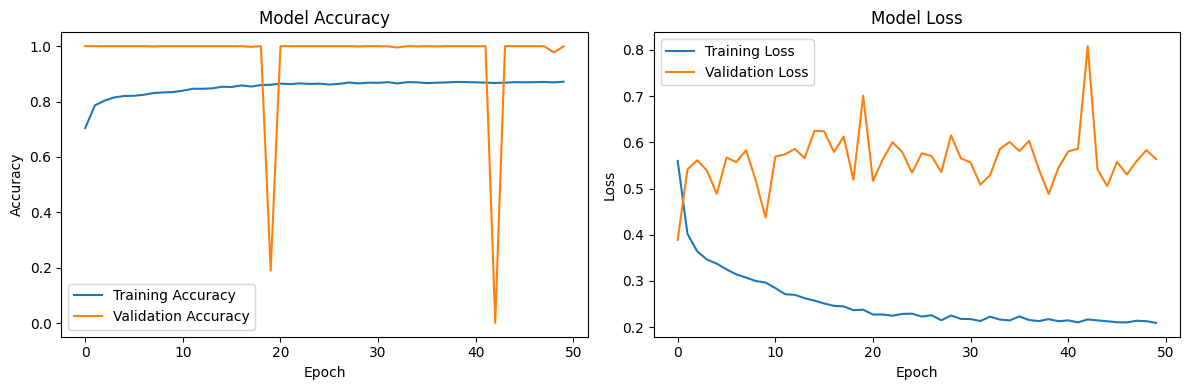

In [7]:
# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()